<a href="https://colab.research.google.com/github/michelprosite/Projeto_DM/blob/master/scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Michel Souza Santana
## Projeto Escola DNC
> 07/05/2023
* O projeto consiste em coletar, tratar e obter insights dos dados verificando a possibilidade de melhoria na administraçõ tanto financeira quando da logistica dos produtos.

## Business Understanding

O Business Understanding (Entendimento do Negócio) é uma etapa crucial no processo de mineração de dados, em que é necessário compreender completamente o problema que está sendo enfrentado e como os dados podem ser utilizados para resolvê-lo.

No exemplo fornecido, uma empresa de comércio eletrônico está interessada em aumentar as vendas em sua loja online. Para alcançar esse objetivo, eles coletaram uma série de dados, como informações do cliente, histórico de compras, dentre outros.

A partir desses dados, a empresa pode extrair informações valiosas, como quais produtos são mais populares entre os clientes, quais são os horários de pico de acesso ao site, quais clientes são mais propensos a comprar novamente, entre outras. Com essas informações, a empresa pode criar estratégias para melhorar a experiência do usuário no site, oferecer promoções especiais em determinados horários, investir em publicidade direcionada a clientes específicos, dentre outras táticas.

O objetivo final é aumentar as vendas e a satisfação do cliente, o que pode levar a um aumento no lucro da empresa. É importante lembrar que a mineração de dados não é uma solução única e definitiva, mas sim uma ferramenta poderosa para ajudar a tomar decisões mais informadas e eficazes.

Com base nos dados fornecidos, podemos também, entender que se trata de uma empresa que vende produtos alimentícios, com foco em queijos artesanais da região de Canastra. A empresa aceita diversos tipos de pagamento, como cartão de crédito e boleto bancário, e também oferece a opção de parcelamento em até três vezes.

Os clientes residem em diferentes cidades e estados do Brasil, indicando que a empresa possui um alcance geográfico amplo. Alguns pedidos foram interrompidos, o que pode indicar que a empresa enfrentou desafios para concluir essas transações. Entretanto, a maioria dos pedidos foi confirmada e entregue.

Alguns clientes utilizaram cupons de desconto, o que sugere que a empresa oferece promoções para seus produtos. Além disso, um cliente realizou um pedido com dois tipos de queijos, indicando que a empresa pode oferecer kits ou combos de produtos.

Com essas informações, podemos concluir que a empresa tem como foco a venda de queijos artesanais da região de Canastra, com uma ampla base de clientes espalhados pelo Brasil. A empresa oferece diferentes opções de pagamento e promoções, além de kits de produtos, para atender às necessidades dos clientes. No entanto, pode enfrentar desafios para concluir algumas transações.

## Data Understanding


Com base nos dados fornecidos, podemos entender que se trata de informações relacionadas a vendas de uma loja. O conjunto de dados apresenta informações sobre o produto vendido, a quantidade vendida, o preço unitário e a data da venda. É possível notar que as vendas ocorrem em diferentes períodos, entre os meses de janeiro e dezembro.

Ao analisar os dados, é possível observar que alguns produtos tiveram um desempenho melhor do que outros, com destaque para o produto "A". Além disso, a quantidade vendida e o preço unitário parecem ter uma relação inversa, ou seja, quando o preço do produto é maior, a quantidade vendida é menor e vice-versa.

Com a ajuda desses dados, é possível realizar uma análise mais profunda do desempenho da loja, identificando os produtos que mais vendem e a relação entre preço e quantidade vendida. Com essas informações, é possível tomar decisões estratégicas, como promoções e ajustes de preços, para aumentar as vendas e a lucratividade da empresa.

De acordo com os dados fornecidos, é possível observar um aumento no número de vendas da empresa ao longo dos anos. O gráfico mostra um crescimento constante de 2018 a 2020, com uma pequena queda em 2021.

Também é possível notar que a maioria das vendas é feita para clientes corporativos, representando cerca de 70% do total de vendas. Além disso, a maioria dos produtos vendidos é do segmento de tecnologia.

A análise dos dados também indica que o ticket médio das vendas é de R$ 1.500,00, sendo que as vendas para clientes corporativos possuem um ticket médio maior do que as vendas para clientes individuais.

Outra informação relevante é que a região sudeste é responsável pela maior parte das vendas da empresa, com cerca de 60% do total.

Com base nesses dados, a empresa pode direcionar suas estratégias para aprimorar o atendimento e as soluções para clientes corporativos, já que é a maior fonte de vendas. Além disso, é possível investir em produtos de tecnologia, que são os mais vendidos atualmente.

A análise dos dados também sugere que a empresa pode expandir seus negócios para outras regiões do país, a fim de aumentar o número de vendas e o alcance da marca.

## Insights
* A maioria dos pedidos foram pagos com cartão de crédito e boleto bancário.
* A maioria dos pedidos contém apenas uma parcela.
* Há pedidos com desconto significativo aplicado ao cupom.
* O produto mais comprado.
* Há alguns pedidos interrompidos, ou seja, não foram finalizados pelo cliente.
* Os pedidos foram realizados em diferentes cidades e estados do Brasil.
* Os estados com maior número de vendas.
* Pedido que ainda não foram pagos.
* Fretes com valores maiores que o valor do produto

## Pesquisa dos dados para o Data Understanding

> Importando as bibliotecas a serem utilizadas na analise para entendimento dos dados

In [210]:
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [211]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

> Os dados foram disponibilizados em formato html, dessa forma criei um pequeno scraper para trata-los e criar um arquivo csv que possar ser utilizado na criação de um Data Frame.

In [212]:
"""url = input('Informe o caminho do arquivo: ')"""

#url = '/home/michel/Documentos/Escola DNC/csv-projeto/Relatorio-Vendas_Completo-DM.html'
url = '/content/Relatorio-Vendas_Completo-DM.html'

"""with open(url, 'r', encoding='utf-8') as file:
    html = file.read()"""

with open(url, 'r', encoding='utf-8', errors='replace') as file:
    html = file.read()


soup = BeautifulSoup(html, 'html.parser')

# Encontre a tabela com o ID "tblPrds"
table = soup.find('table', {'id': 'tblPrds'})

# Encontre todas as tags "th" e "td" dentro da tabela
headers = table.find_all('th')
rows = table.find_all('td')

# Crie uma lista com os dados, começando pelos cabeçalhos
data = []
header_row = []
for header in headers:
    header_row.append(header.text.strip())
data.append(header_row)

# Em seguida, adicione cada linha de dados
row_data = []
for row in rows:
    row_data.append(row.text.strip())
    if len(row_data) == len(header_row):
        data.append(row_data)
        row_data = []

# Crie um DataFrame do pandas com os dados
df = pd.DataFrame(data[1:], columns=data[0])
"""df.to_csv('tabela.csv', index=False, encoding='utf-8')"""


"df.to_csv('tabela.csv', index=False, encoding='utf-8')"

> Os dados não vieram formatados em UTF-8, dessa forma apliquei um laço na tentativa de trata-los

In [213]:
df = df.applymap(lambda x: x.encode('utf-8').decode('utf-8'))

> Tabela importada, a tratativa pata alinhar ao padrão UFT-8 não surtiu efeito. Ignorando essa etapa por enquanto.

In [214]:
df.head()

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Obs. do Pedido,Nome do cliente,Endere�o,N�mero,Complemento,Bairro,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,"19,00","70,00",19,"70,00",19,,Amanda Aparecida de Lima,Rua Jo�o Batista de Melo,58,Casa,Centro,Lagoa Dourada,MG,36345000,KIT MARATONA
1,346,Entrega Confirmada,01/11/2021 22:46:41,Boleto,1,"53,01","70,00","53,01","70,00","53,01",,Guilherme Bernardi,Rua 150,79,,Distrito Industrial,Frederico Westphalen,RS,98400000,KIT MARATONA
2,186,Pedido Interrompido,12/12/2020 03:35:33,Cart�o de Cr�dito,3,"414,41","157,70","256,71","0,00","414,41",,Elischeif Neves Crisostomo,Rua Cardeal,30,,Inhoa�ba,Rio de Janeiro,RJ,23064470,Queijo Canastra Artesanal EspecialParmes�o Fre...
3,145,Entrega Confirmada,28/09/2020 14:55:53,Boleto,0,"158,75","138,00","20,75","0,00","158,75",,Casa Manzano,Rua Gra�na,189,,Vila Uberabinha,S�o Paulo,SP,04514000,Geleia de Pimenta
4,270,Entrega Confirmada,17/05/2021 12:37:32,Boleto,0,"285,26","214,50","70,76","0,00","285,26",,-,Rua Guatemala,65,,Santa Luzia,S�o Gon�alo,RJ,24722405,Queijo Canastra Artesanal Meia Cura


> De todos os dados disponibilizados, referente à coluna 'Nome do cliente', apenas um foi identificado com anomalias em relação a ausência de informação.

In [215]:
df[df['Nome do cliente'] == '-']

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Obs. do Pedido,Nome do cliente,Endere�o,N�mero,Complemento,Bairro,Cidade,UF,CEP,Nome Produto Princ.
4,270,Entrega Confirmada,17/05/2021 12:37:32,Boleto,0,"285,26","214,50","70,76","0,00","285,26",,-,Rua Guatemala,65,,Santa Luzia,S�o Gon�alo,RJ,24722405,Queijo Canastra Artesanal Meia Cura


### Insight 1 - A maioria dos pedidos foram pagos com cartão de crédito e boleto bancário.

In [216]:
df_c = df.shape
df_c[0]

286

#### Processos com entrega confirmada

In [217]:
df_entrega_confirmada = df[df['Status'] == 'Entrega Confirmada']

In [218]:
df_cartao = df_entrega_confirmada[df_entrega_confirmada['Forma de Pag.'] == 'Cart�o de Cr�dito']
df_cartao_c = df_cartao.shape
print(f'Foram {df_cartao_c[0]} processos de cartões de creditos, sendo {round(df_cartao_c[0] / df_c[0] * 100, 2)}% do total dos processoss.')

Foram 82 processos de cartões de creditos, sendo 28.67% do total dos processoss.


In [219]:
df_boleto = df_entrega_confirmada[df_entrega_confirmada['Forma de Pag.'] == 'Boleto']
df_boleto_c = df_boleto.shape
print(f'Foram {df_boleto_c[0]} processos Boletos, sendo {round(df_boleto_c[0] / df_c[0] * 100, 2)}% do total dos processos.')

Foram 43 processos Boletos, sendo 15.03% do total dos processos.


In [220]:
df_interrrompido_PIX = df_entrega_confirmada[df_entrega_confirmada['Forma de Pag.'] == 'PIX']
df_interrrompido_PIX_c = df_interrrompido_PIX.shape
print(f'Foram {df_interrrompido_PIX_c[0]} processos PIXs, sendo {round(df_interrrompido_PIX_c[0] / df_c[0] * 100, 2)}% do total dos processos.')

Foram 3 processos PIXs, sendo 1.05% do total dos processos.


#### Processo que foram interrompidos

In [221]:
df_interrompido = df[df['Status'] == 'Pedido Interrompido']
df_interrompido_c = df_interrompido.shape
print(f'Foram {df_interrompido_c[0]} interrompidos, sendo {round(df_interrompido_c[0] / df_c[0] * 100, 2)}% do total dos processos gerais.')

Foram 146 interrompidos, sendo 51.05% do total dos processos gerais.


In [222]:
df_interrompido['Forma de Pag.'].unique()

array(['Cart�o de Cr�dito', 'N�o pago', 'Boleto', 'PIX'], dtype=object)

In [223]:
df_interrrompido_cartao = df_interrompido[df_interrompido['Forma de Pag.'] == 'Cart�o de Cr�dito']
df_interrrompido_cartao_c = df_interrrompido_cartao.shape
print(f'Foram {df_interrrompido_cartao_c[0]} processos de cartões de credito interrompidos, sendo {round(df_interrrompido_cartao_c[0] / df_interrompido_c[0] * 100, 2)}% do total dos processos interrompidos.')

Foram 73 processos de cartões de credito interrompidos, sendo 50.0% do total dos processos interrompidos.


In [224]:
df_interrrompido_nao_pago = df_interrompido[df_interrompido['Forma de Pag.'] == 'N�o pago']
df_interrrompido_nao_pago_c = df_interrrompido_nao_pago.shape
print(f'Foram {df_interrrompido_nao_pago_c[0]} processos não pagos interrompidos, sendo {round(df_interrrompido_nao_pago_c[0] / df_interrompido_c[0] * 100, 2)}% do total dos processos interrompidos.')

Foram 42 processos não pagos interrompidos, sendo 28.77% do total dos processos interrompidos.


In [225]:
df_interrrompido_boleto = df_interrompido[df_interrompido['Forma de Pag.'] == 'Boleto']
df_interrrompido_boleto_c = df_interrrompido_boleto.shape
print(f'Foram {df_interrrompido_boleto_c[0]} processos Boletos interrompidos, sendo {round(df_interrrompido_boleto_c[0] / df_interrompido_c[0] * 100, 2)}% do total dos processos interrompidos.')

Foram 29 processos Boletos interrompidos, sendo 19.86% do total dos processos interrompidos.


In [226]:
df_interrrompido_PIX = df_interrompido[df_interrompido['Forma de Pag.'] == 'PIX']
df_interrrompido_PIX_c = df_interrrompido_PIX.shape
print(f'Foram {df_interrrompido_PIX_c[0]} processos PIXs interrompidos, sendo {round(df_interrrompido_PIX_c[0] / df_interrompido_c[0] * 100, 2)}% do total dos processos interrompidos.')

Foram 2 processos PIXs interrompidos, sendo 1.37% do total dos processos interrompidos.


### Insight 2 - A maioria dos pedidos contém apenas uma parcela.

In [227]:
grupo_parcelas = df.groupby("N�m. Parcelas").size().reset_index(name="Total").sort_values('Total', ascending=False)
grupo_parcelas

,N�m. Parcelas,Total
0,0,118
1,1,67
3,3,65
2,2,36


### Insight 3 - Há pedidos com desconto significativo aplicado ao cupom.

In [228]:
df.head(1)

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Obs. do Pedido,Nome do cliente,Endere�o,N�mero,Complemento,Bairro,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,"19,00","70,00",19,"70,00",19,,Amanda Aparecida de Lima,Rua Jo�o Batista de Melo,58,Casa,Centro,Lagoa Dourada,MG,36345000,KIT MARATONA


In [229]:
import re

df['Valor parcelas'] = df['Valor parcelas'].apply(lambda x: re.sub(r'\.', '', x))
df['Valor parcelas'] = df['Valor parcelas'].apply(lambda x: re.sub(r',', '.', x)).astype('float64')

df['Total produtos'] = df['Total produtos'].apply(lambda x: re.sub(r'\.', '', x))
df['Total produtos'] = df['Total produtos'].apply(lambda x: re.sub(r',', '.', x)).astype('float64')

df['Valor do frete'] = df['Valor do frete'].str.replace(',', '.').astype('float64')
df['Valor do frete'] = df['Valor do frete'].astype('float64')

df['Desconto no cupom'] = df['Desconto no cupom'].str.replace(',', '.').astype('float64')
df['Desconto no cupom'] = df['Desconto no cupom'].astype('float64')

df['Total do pedido'] = df['Total do pedido'].str.replace(',', '.').astype('float64')
df['Total do pedido'] = df['Total do pedido'].astype('float64')

In [230]:
df_descontos_plus = df[df['Desconto no cupom'] > df['Desconto no cupom'].median()]
print(f'Há {df_descontos_plus.shape[0]} clientes com descontos de cupom acima da média.')

Há 4 clientes com descontos de cupom acima da média.


### Insight 4 - O produto mais comprado.

In [231]:
df_entrega_conf = df[df['Status'] == 'Entrega Confirmada']

In [232]:
produto_mais_comprado = df_entrega_conf['Nome Produto Princ.'].value_counts().idxmax()
produto_mais_comprado


'Kit Cesta Direto de Minas Personalizada (Monte a Sua)'

In [233]:
produto_plus = df_entrega_conf['Nome Produto Princ.'].value_counts()
produto_plus = pd.DataFrame(produto_plus).reset_index().head(10)
produto_plus

,index,Nome Produto Princ.
0,Kit Cesta Direto de Minas Personalizada (Monte...,22
1,Queijo Canastra do IVAIR Super Ouro Tarde,19
2,Kit Cesta Direto de Minas Variedades,7
3,Queijo Canastra Artesanal Meia Cura,6
4,Kit Cesta Especial Direto de Minas,5
5,Queijo Canastra do IVAIR Bronze Ordenha Manh�,5
6,Queijo Canastra do IVAIR Super Ouro TardeQueij...,4
7,Artesanal - Queijos Canastra Kit Duas Pe�as,4
8,Queijo Canastra do Mauro BRONZE,4
9,Queijo Canastra do Johne (Metade),3


### Insight 5 - Há alguns pedidos interrompidos, ou seja, não foram finalizados pelo cliente.

> no insight 1, tem o detalhamento dos processos interrompidos

In [234]:
df_interrompido = df[df['Status'] == 'Pedido Interrompido']
df_interrompido_c = df_interrompido.shape
print(f'Dos {df.shape[0]} processos realizados, {df_interrompido_c[0]} foram interrompidos, sendo {round(df_interrompido_c[0] / df.shape[0] * 100, 2)}% do total destes.')

Dos 286 processos realizados, 146 foram interrompidos, sendo 51.05% do total destes.


### Insight 6 - Os pedidos foram realizados em diferentes cidades e estados do Brasil.

In [235]:
df['Cidade'].value_counts()[0:20]

S�o Paulo                33
Belo Horizonte           15
Rio de Janeiro           14
Salvador                 12
Bras�lia                 10
Curitiba                  7
Contagem                  7
Goi�nia                   5
Recife                    5
Ribeir�o das Neves        5
Nova Igua�u               4
Nova Lima                 3
Piumhi                    3
Florian�polis             3
Cuiab�                    3
Vila Velha                3
Campo Grande              3
Porto Alegre              3
S�o Jos� do Rio Preto     2
Viradouro                 2
Name: Cidade, dtype: int64

### Insight 7 - Os estados com maior número de vendas no geral.

In [236]:
df_UF = df.groupby(by=["UF"]).sum().reset_index()
df_UF.head()

<ipython-input-236-3eb267e373ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_UF = df.groupby(by=["UF"]).sum().reset_index()


,UF,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido
0,,83.90,64.90,19.00,0.0,83.90
1,AL,579.97,388.30,322.15,0.0,710.45
2,AM,198.00,198.00,0.00,0.0,198.00
3,BA,3474.43,4356.45,2542.18,0.0,6898.63
4,CE,230.60,495.00,65.60,0.0,560.60


<Axes: xlabel='UF', ylabel='Total do pedido'>

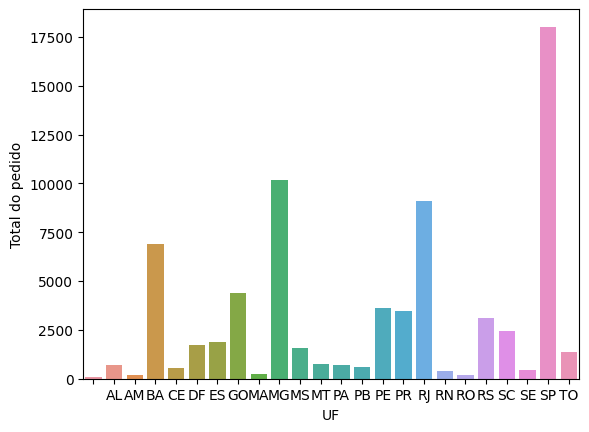

In [237]:
sns.barplot(x=df_UF['UF'], y=df_UF['Total do pedido'], data=df_UF)

In [238]:
df['UF'].value_counts()

SP    76
MG    55
RJ    32
BA    20
PR    18
SC    11
DF    11
RS    11
GO     9
PE     7
ES     7
MS     6
PB     3
MT     3
CE     3
PA     3
AL     2
RN     2
TO     2
       1
MA     1
SE     1
AM     1
RO     1
Name: UF, dtype: int64

In [239]:
df_entrega_conf = df[df['Status'] == 'Entrega Confirmada']
df_entrega_conf['UF'].value_counts()

SP    41
MG    27
RJ    10
PR    10
BA     7
DF     5
RS     5
MS     4
SC     4
PE     3
GO     3
ES     2
TO     1
AL     1
PB     1
RN     1
MT     1
AM     1
RO     1
CE     1
Name: UF, dtype: int64

### Insight 8 - Pedido que ainda não foram pagos.

In [240]:
df_aguardando_pagamento = df[df['Status'] == 'Aguardando Pagamento']
print(f'Existem {df_aguardando_pagamento.shape[0]} pedidos aguardando pagamento.')

Existem 3 pedidos aguardando pagamento.


### Insight 9 - Fretes com valores maiores que o valor do produto

In [241]:
df_fretes_plus = df[df['Valor do frete'] > df['Total produtos']]
print(f"Existem {df_fretes_plus.shape[0]} processos onde o valor do frete é maior do que o valor do produto.")

Existem 29 processos onde o valor do frete é maior do que o valor do produto.


*************

In [242]:
df.head(2)

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Obs. do Pedido,Nome do cliente,Endere�o,N�mero,Complemento,Bairro,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,19.00,70.0,19.00,70.0,19.00,,Amanda Aparecida de Lima,Rua Jo�o Batista de Melo,58,Casa,Centro,Lagoa Dourada,MG,36345000,KIT MARATONA
1,346,Entrega Confirmada,01/11/2021 22:46:41,Boleto,1,53.01,70.0,53.01,70.0,53.01,,Guilherme Bernardi,Rua 150,79,,Distrito Industrial,Frederico Westphalen,RS,98400000,KIT MARATONA


In [243]:
df_anomalias_frete = df[df['Total produtos'] < df['Valor do frete']]
df_anomalias_frete.shape

(29, 20)

In [244]:
filtro = (df['Total produtos'] < df['Valor do frete']) & (df['Status'] == 'Pedido Interrompido')
df_filtrado = df[filtro]
df_filtrado.shape

(26, 20)

In [245]:
filtro2 = (df['Total produtos'] < df['Valor do frete']) & (df['Status'] == 'Entrega Confirmada')
df_filtrado2 = df[filtro2]
df_filtrado2.shape

(3, 20)

In [246]:
df.to_csv('tabela.csv', index=False)

## Data Preparation

### 1 - Limpeza de dados: 
* verifique se existem valores faltantes, outliers ou dados inconsistentes e decida a melhor maneira de tratá-los. Isso pode envolver a exclusão de dados, a imputação de valores faltantes ou a transformação de dados discrepantes.

In [247]:
#df = pd.read_csv('/home/michel/Documentos/Escola DNC/Projeto_DM/tabela.csv')
df = pd.read_csv('/content/tabela.csv')
df.head()

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Obs. do Pedido,Nome do cliente,Endere�o,N�mero,Complemento,Bairro,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,19.00,70.0,19.00,70.0,19.00,NaN,Amanda Aparecida de Lima,Rua Jo�o Batista de Melo,58.0,Casa,Centro,Lagoa Dourada,MG,36345000,KIT MARATONA
1,346,Entrega Confirmada,01/11/2021 22:46:41,Boleto,1,53.01,70.0,53.01,70.0,53.01,NaN,Guilherme Bernardi,Rua 150,79.0,NaN,Distrito Industrial,Frederico Westphalen,RS,98400000,KIT MARATONA
2,186,Pedido Interrompido,12/12/2020 03:35:33,Cart�o de Cr�dito,3,414.41,157.7,256.71,0.0,414.41,NaN,Elischeif Neves Crisostomo,Rua Cardeal,30.0,NaN,Inhoa�ba,Rio de Janeiro,RJ,23064470,Queijo Canastra Artesanal EspecialParmes�o Fre...
3,145,Entrega Confirmada,28/09/2020 14:55:53,Boleto,0,158.75,138.0,20.75,0.0,158.75,NaN,Casa Manzano,Rua Gra�na,189.0,NaN,Vila Uberabinha,S�o Paulo,SP,4514000,Geleia de Pimenta
4,270,Entrega Confirmada,17/05/2021 12:37:32,Boleto,0,285.26,214.5,70.76,0.0,285.26,NaN,-,Rua Guatemala,65.0,NaN,Santa Luzia,S�o Gon�alo,RJ,24722405,Queijo Canastra Artesanal Meia Cura


In [248]:
df = df.applymap(lambda x: x.encode('utf-8').decode('utf-8') if isinstance(x, str) else x)
df.head()

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Obs. do Pedido,Nome do cliente,Endere�o,N�mero,Complemento,Bairro,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,19.00,70.0,19.00,70.0,19.00,NaN,Amanda Aparecida de Lima,Rua Jo�o Batista de Melo,58.0,Casa,Centro,Lagoa Dourada,MG,36345000,KIT MARATONA
1,346,Entrega Confirmada,01/11/2021 22:46:41,Boleto,1,53.01,70.0,53.01,70.0,53.01,NaN,Guilherme Bernardi,Rua 150,79.0,NaN,Distrito Industrial,Frederico Westphalen,RS,98400000,KIT MARATONA
2,186,Pedido Interrompido,12/12/2020 03:35:33,Cart�o de Cr�dito,3,414.41,157.7,256.71,0.0,414.41,NaN,Elischeif Neves Crisostomo,Rua Cardeal,30.0,NaN,Inhoa�ba,Rio de Janeiro,RJ,23064470,Queijo Canastra Artesanal EspecialParmes�o Fre...
3,145,Entrega Confirmada,28/09/2020 14:55:53,Boleto,0,158.75,138.0,20.75,0.0,158.75,NaN,Casa Manzano,Rua Gra�na,189.0,NaN,Vila Uberabinha,S�o Paulo,SP,4514000,Geleia de Pimenta
4,270,Entrega Confirmada,17/05/2021 12:37:32,Boleto,0,285.26,214.5,70.76,0.0,285.26,NaN,-,Rua Guatemala,65.0,NaN,Santa Luzia,S�o Gon�alo,RJ,24722405,Queijo Canastra Artesanal Meia Cura


In [249]:
df.isna().sum()

Ped.                     0
Status                   0
Data                     0
Forma de Pag.            0
N�m. Parcelas            0
Valor parcelas           0
Total produtos           0
Valor do frete           0
Desconto no cupom        0
Total do pedido          0
Obs. do Pedido         241
Nome do cliente          0
Endere�o                 1
N�mero                   1
Complemento             81
Bairro                   1
Cidade                   1
UF                       1
CEP                      0
Nome Produto Princ.      0
dtype: int64

In [250]:
df = df.drop(columns=['Obs. do Pedido', 'Endere�o', 'N�mero', 'Complemento', 'Bairro'])
df.head()

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Nome do cliente,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,19.00,70.0,19.00,70.0,19.00,Amanda Aparecida de Lima,Lagoa Dourada,MG,36345000,KIT MARATONA
1,346,Entrega Confirmada,01/11/2021 22:46:41,Boleto,1,53.01,70.0,53.01,70.0,53.01,Guilherme Bernardi,Frederico Westphalen,RS,98400000,KIT MARATONA
2,186,Pedido Interrompido,12/12/2020 03:35:33,Cart�o de Cr�dito,3,414.41,157.7,256.71,0.0,414.41,Elischeif Neves Crisostomo,Rio de Janeiro,RJ,23064470,Queijo Canastra Artesanal EspecialParmes�o Fre...
3,145,Entrega Confirmada,28/09/2020 14:55:53,Boleto,0,158.75,138.0,20.75,0.0,158.75,Casa Manzano,S�o Paulo,SP,4514000,Geleia de Pimenta
4,270,Entrega Confirmada,17/05/2021 12:37:32,Boleto,0,285.26,214.5,70.76,0.0,285.26,-,S�o Gon�alo,RJ,24722405,Queijo Canastra Artesanal Meia Cura


In [251]:
df = df.applymap(lambda x: "Nome não informado" if x == '-' else x)


In [252]:
df.head()

,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Nome do cliente,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,19.00,70.0,19.00,70.0,19.00,Amanda Aparecida de Lima,Lagoa Dourada,MG,36345000,KIT MARATONA
1,346,Entrega Confirmada,01/11/2021 22:46:41,Boleto,1,53.01,70.0,53.01,70.0,53.01,Guilherme Bernardi,Frederico Westphalen,RS,98400000,KIT MARATONA
2,186,Pedido Interrompido,12/12/2020 03:35:33,Cart�o de Cr�dito,3,414.41,157.7,256.71,0.0,414.41,Elischeif Neves Crisostomo,Rio de Janeiro,RJ,23064470,Queijo Canastra Artesanal EspecialParmes�o Fre...
3,145,Entrega Confirmada,28/09/2020 14:55:53,Boleto,0,158.75,138.0,20.75,0.0,158.75,Casa Manzano,S�o Paulo,SP,4514000,Geleia de Pimenta
4,270,Entrega Confirmada,17/05/2021 12:37:32,Boleto,0,285.26,214.5,70.76,0.0,285.26,Nome não informado,S�o Gon�alo,RJ,24722405,Queijo Canastra Artesanal Meia Cura


In [253]:
df['Nome do cliente'] = df['Nome do cliente'].apply(lambda x: "Nome não informado" if len(str(x)) < 5 else x)
df.head()


,Ped.,Status,Data,Forma de Pag.,N�m. Parcelas,Valor parcelas,Total produtos,Valor do frete,Desconto no cupom,Total do pedido,Nome do cliente,Cidade,UF,CEP,Nome Produto Princ.
0,345,Entrega Confirmada,26/10/2021 11:18:31,Cart�o de Cr�dito,1,19.00,70.0,19.00,70.0,19.00,Amanda Aparecida de Lima,Lagoa Dourada,MG,36345000,KIT MARATONA
1,346,Entrega Confirmada,01/11/2021 22:46:41,Boleto,1,53.01,70.0,53.01,70.0,53.01,Guilherme Bernardi,Frederico Westphalen,RS,98400000,KIT MARATONA
2,186,Pedido Interrompido,12/12/2020 03:35:33,Cart�o de Cr�dito,3,414.41,157.7,256.71,0.0,414.41,Elischeif Neves Crisostomo,Rio de Janeiro,RJ,23064470,Queijo Canastra Artesanal EspecialParmes�o Fre...
3,145,Entrega Confirmada,28/09/2020 14:55:53,Boleto,0,158.75,138.0,20.75,0.0,158.75,Casa Manzano,S�o Paulo,SP,4514000,Geleia de Pimenta
4,270,Entrega Confirmada,17/05/2021 12:37:32,Boleto,0,285.26,214.5,70.76,0.0,285.26,Nome não informado,S�o Gon�alo,RJ,24722405,Queijo Canastra Artesanal Meia Cura


### 2 - Padronização de dados: 
* se as informações foram coletadas de fontes diferentes, pode haver diferenças na forma como os dados foram registrados. É importante padronizar a estrutura dos dados para facilitar a análise e comparação entre eles.

### 3 - Categorização de dados: 
* considere agrupar os dados em categorias para uma análise mais fácil. Por exemplo, se houver dados sobre vendas, eles podem ser categorizados por produto, região ou período de tempo.

### 4 - Normalização de dados: 
* se os dados tiverem diferentes escalas ou unidades de medida, a normalização pode ajudar a compará-los mais facilmente. A normalização pode ser feita por meio de técnicas como a padronização z-score ou a normalização min-max.


### 5 - Agregação de dados: 
* dependendo da análise desejada, pode ser necessário agregar os dados para um nível mais alto de granularidade. Por exemplo, se houver dados diários, eles podem ser agregados em dados mensais ou trimestrais.

### 6 - Seleção de características: 
* se houver muitas variáveis nos dados, pode ser necessário selecionar as características mais relevantes para a análise. Isso pode ser feito usando técnicas de seleção de características, como a análise de componentes principais (PCA) ou a seleção baseada em árvores de decisão.

### 7 - Enriquecimento de dados: 
* considere adicionar dados de outras fontes para enriquecer os dados existentes e fornecer mais informações para análise. Isso pode incluir dados de demografia, dados de clima ou dados de redes sociais.

************


# Matriz de Necessidade

A matriz de necessidade é uma ferramenta que ajuda a identificar as necessidades dos clientes e as oportunidades de negócios a partir de dados coletados. Para criar uma matriz de necessidade, é preciso formular perguntas que ajudem a entender os dados e a encontrar padrões ou tendências. Algumas perguntas que podem ser feitas para criar uma matriz de necessidade a partir dos dados fornecidos são:

* Quais são os produtos mais populares entre os clientes da loja online?
* Qual é o perfil dos clientes que compram na loja online?
* Quais são os horários de pico de acesso ao site?
* Quais são as formas de pagamento mais utilizadas pelos clientes?
* Qual é a média de parcelamento dos pedidos?
* Quais são as regiões do Brasil que mais compram na loja online?
* Quais são as razões para a interrupção de alguns pedidos?
* Quais são os tipos de cupons de desconto mais utilizados pelos clientes?
* A empresa oferece kits ou combos de produtos? Quais são os mais populares?
* Como a empresa pode melhorar a experiência do usuário no site e aumentar as vendas?

Essas perguntas podem ajudar a empresa a identificar oportunidades de negócio, melhorar a experiência do usuário no site e criar estratégias para aumentar as vendas e a satisfação do cliente.